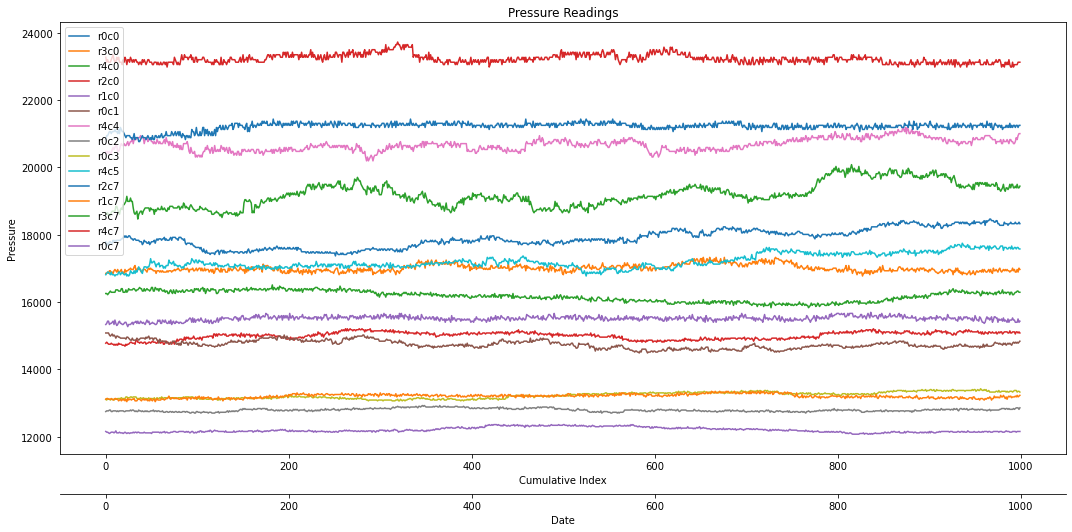

In [189]:
#----------ATS results Grapher
#---written by james Altizer and Kevin Nguyen
#7/8/2022
#version 1.0.0
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#-----------------------------------------plot1
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True

columns= ['Cumulative Index','r0c0','r3c0','r4c0','r2c0','r1c0', 'r0c1', 'r4c4', 'r0c2', 'r0c3', 'r4c5', 'r2c7', 'r1c7', 'r3c7', 'r4c7', 'r0c7']

df=pd.read_csv('11020434_press.csv', usecols=columns, nrows=1000,index_col=0)
s_to_plot=df.sort_index(ascending=True).tail(1000)
ax=s_to_plot.plot(title = "Pressure Readings")
ax2 = ax.secondary_xaxis("bottom")
plt.ylabel('Pressure')

ax2.set_xlabel("Date")
ax2.spines['bottom'].set_position(('outward', 40))


In [ ]:
#-----------------------------------------plot2
x = np.linspace(1,13, num=301)
y = (np.sin(x)+1.01)*3000

# Define function and its inverse
f = lambda x: (300*x)
g = lambda x: (x)

groups = [('GroupA', (0,200)),
            ('GroupB', (200,400)),
            ('GroupC', (400,600)) ]




fig, ax = plt.subplots()

ax.semilogy(x, y, label='date')

ax2 = ax.secondary_xaxis("bottom", functions=(f,g))

ax2.set_xlabel("index")
ax2.spines['bottom'].set_position(('outward', 40))
ax.set_xlabel("x")

In [ ]:
#-----------------------------------------plot3

def main():
    #-- Generate some data ----------------------------------------------------
    nx = 10
    x = np.linspace(0, 2*np.pi, 10)
    y = 2 * np.sin(x)

    groups = [('A', (x[0], x[nx//3])),
              ('B', (x[-2*nx//3], x[2*nx//3])),
              ('C', (x[-nx//3], x[-1]))]

    #-- Plot the results ------------------------------------------------------
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Give ourselves a bit more room at the bottom
    plt.subplots_adjust(bottom=0.2)

    ax.plot(x,y, 'k^')

    # Drop the bottom spine by 40 pts
    ax.spines['bottom'].set_position(('outward', 40))

    # Make a second bottom spine in the position of the original bottom spine
    make_second_bottom_spine(label='Treatment')

    # Annotate the groups
    for name, xspan in groups:
        annotate_group(name, xspan)

    plt.xlabel('Dose')
    plt.ylabel('Response')
    plt.title('Experimental Data')

    plt.show()


def annotate_group(name, xspan, ax=None):
    """Annotates a span of the x-axis"""
    def annotate(ax, name, left, right, y, pad):
        arrow = ax.annotate(name,
                xy=(left, y), xycoords='data',
                xytext=(right, y-pad), textcoords='data',
                annotation_clip=False, verticalalignment='top',
                horizontalalignment='center', linespacing=2.0,
                arrowprops=dict(arrowstyle='-', shrinkA=0, shrinkB=0,
                        connectionstyle='angle,angleB=90,angleA=0,rad=5')
                )
        return arrow
    if ax is None:
        ax = plt.gca()
    ymin = ax.get_ylim()[0]
    ypad = 0.01 * np.ptp(ax.get_ylim())
    xcenter = np.mean(xspan)
    left_arrow = annotate(ax, name, xspan[0], xcenter, ymin, ypad)
    right_arrow = annotate(ax, name, xspan[1], xcenter, ymin, ypad)
    return left_arrow, right_arrow

def make_second_bottom_spine(ax=None, label=None, offset=0, labeloffset=20):
    """Makes a second bottom spine"""
    if ax is None:
        ax = plt.gca()
    second_bottom = mpl.spines.Spine(ax, 'bottom', ax.spines['bottom']._path)
    second_bottom.set_position(('outward', offset))
    ax.spines['second_bottom'] = second_bottom

    if label is not None:
        # Make a new xlabel
        ax.annotate(label, 
                xy=(0.5, 0), xycoords='axes fraction', 
                xytext=(0, -labeloffset), textcoords='offset points', 
                verticalalignment='top', horizontalalignment='center')

if __name__ == '__main__':
    main()


plt.show()